# Предварительный анализ данных

Для начала импортируем все необходимые библиотеки для предварительного анализа данных (для работы с таблицами, векторами и матрицами, для построения графиков и корреляционных матриц)

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Откроем датасет (в кавычках указан путь к файлу на моем копмьютере, нужно его заменить), указанные параметры - параметры открытия файла csv. Если русские символы декодируются неправильно или что-то ломается - следует убрать " engine='python' ". Далее открываем датасет

In [3]:
df = pd.read_csv("C:/Users/Даша/Anaconda3/PROJECT_EKM/dataset.csv", engine='python', sep=";", decimal=',')
df

,№,Наименование,Год,"Возраст компании, лет",Статус,Организационно-правовая форма,Форма собственности,"Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
0,1,"ПОДШИПНИК, ЗАО ТД",20.00,24.50,1.00,0.00,0.00,2414000.00,3259000.00,-247052000.00,22730000.00,227573000.00,250303000.00,25000.00,0.00,0.74,-75.81,6.97,69.83,76.80,0.01,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
1,2,"СИНДИКАТ-С, ООО",20.00,12.00,1.00,5.00,0.00,413000.00,413000.00,-26249000.00,24121000.00,2530000.00,26651000.00,9970000.00,3.10,1.00,-63.56,58.40,6.13,64.53,24.14,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
2,3,"СФЕРА УПАКОВКИ, ООО",20.00,5.00,1.00,5.00,0.00,168824000.00,168824000.00,4711000.00,2059000.00,161944000.00,164003000.00,121213000.00,0.69,1.00,0.03,0.01,0.96,0.97,0.72,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3,4,"ТЭС, АО",20.00,10.50,1.00,0.00,0.00,79877000.00,87991000.00,-21156000.00,1000.00,108074000.00,108075000.00,17238000.00,0.15,0.91,-0.24,0.00,1.23,1.23,0.20,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
4,5,"АВТОКОЛОННА 1958, ООО",20.00,28.00,1.00,5.00,0.00,53509000.00,174544000.00,-31963000.00,32626000.00,172294000.00,204920000.00,1463000.00,0.01,0.31,-0.18,0.19,0.99,1.17,0.01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,3 455,"ЯРКОВСКАЯ, СЕЛЬХОЗАРТЕЛЬ",19.00,28.00,0.00,2.00,0.00,70630000.00,153836000.00,63959000.00,20741000.00,21222000.00,41963000.00,86652000.00,0.59,0.46,0.42,0.13,0.14,0.27,0.56,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
3455,3 456,"ЯРКОВСКОЕ, АО СХП",19.00,28.00,0.00,0.00,0.00,168457000.00,454656000.00,342323000.00,13318000.00,98863000.00,112181000.00,150780000.00,0.34,0.37,0.75,0.03,0.22,0.25,0.33,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
3456,3 457,"ЯРОВИТ, ООО",19.00,8.50,0.00,5.00,0.00,128667000.00,305088000.00,144677000.00,9801000.00,18074000.00,27875000.00,117500000.00,0.28,0.42,0.47,0.03,0.06,0.09,0.39,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3457,3 458,"ЯРТЕХСЕРВИС, ООО",19.00,14.00,0.00,5.00,0.00,44081000.00,52944000.00,46840000.00,62000.00,6032000.00,6094000.00,94691000.00,1.82,0.83,0.88,0.00,0.11,0.12,1.79,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00


Смотрим на данные. Типы числовых данных должны быть типами "int64" или "float64"

In [4]:
for i in df.columns:
    print(df[i].dtype, ':', i)

object : №
object : Наименование
float64 : Год
float64 : Возраст компании, лет
float64 : Статус
float64 : Организационно-правовая форма
float64 : Форма собственности
float64 : Оборотные активы, RUB
float64 : Активы  всего, RUB
float64 : Нераспределенная прибыль (непокрытый убыток), RUB
float64 : Долгосрочные обязательства, RUB
float64 : Краткосрочные обязательства, RUB
float64 : Совокупный долг, RUB
float64 : Выручка, RUB
float64 : Коэффициент оборачиваемости совокупных активов
float64 : Оборотные активы/ТА
float64 : Нераспределенная прибыль (непокрытый убыток)/ТА
float64 : Долгосрочные обязательства/ТА
float64 : Краткосрочные обязательства/ТА
float64 : Совокупный долг/ТА
float64 : Выручка/ТА
float64 : Гос собственность
float64 : Частичная
float64 : Частная
float64 : АО
float64 : Гос собственность.1
float64 : Сельское хозво
float64 : Неком
float64 : Кооперативы
float64 : ООО


Далее убираем все пустые значения, создаем отдельный столбец данных Y = "статус" и убираем статус из датасета

In [5]:
df = df.dropna()

In [6]:
data = df.copy()
Y = data['Статус']
data = data.drop(['Статус'], axis=1)

Создаем датасет data_num только с числовыми данными. Также уберем из датасета категориальные переменные:

'Организационно-правовая форма', 'Форма собственности'

In [7]:
data_num = data.copy()
data_num = data_num.drop(['№','Наименование', 'Организационно-правовая форма', 'Форма собственности'], axis = 1)

## Таблица из числовых значений

In [8]:
data_num

,Год,"Возраст компании, лет","Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
0,20.00,24.50,2414000.00,3259000.00,-247052000.00,22730000.00,227573000.00,250303000.00,25000.00,0.00,0.74,-75.81,6.97,69.83,76.80,0.01,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
1,20.00,12.00,413000.00,413000.00,-26249000.00,24121000.00,2530000.00,26651000.00,9970000.00,3.10,1.00,-63.56,58.40,6.13,64.53,24.14,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
2,20.00,5.00,168824000.00,168824000.00,4711000.00,2059000.00,161944000.00,164003000.00,121213000.00,0.69,1.00,0.03,0.01,0.96,0.97,0.72,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3,20.00,10.50,79877000.00,87991000.00,-21156000.00,1000.00,108074000.00,108075000.00,17238000.00,0.15,0.91,-0.24,0.00,1.23,1.23,0.20,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
4,20.00,28.00,53509000.00,174544000.00,-31963000.00,32626000.00,172294000.00,204920000.00,1463000.00,0.01,0.31,-0.18,0.19,0.99,1.17,0.01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,19.00,29.00,836000.00,28126000.00,3571000.00,14858000.00,8697000.00,23555000.00,12842000.00,0.46,0.03,0.13,0.53,0.31,0.84,0.46,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3454,19.00,28.00,70630000.00,153836000.00,63959000.00,20741000.00,21222000.00,41963000.00,86652000.00,0.59,0.46,0.42,0.13,0.14,0.27,0.56,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
3455,19.00,28.00,168457000.00,454656000.00,342323000.00,13318000.00,98863000.00,112181000.00,150780000.00,0.34,0.37,0.75,0.03,0.22,0.25,0.33,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
3456,19.00,8.50,128667000.00,305088000.00,144677000.00,9801000.00,18074000.00,27875000.00,117500000.00,0.28,0.42,0.47,0.03,0.06,0.09,0.39,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00


Создаем корреляционную матрицу числовых переменных с переменной "статус", а также корреляционную матрицу числовых переменных между собой. Далее создадим список названий столбцов (переменных), чтобы с ними было удобно работать

После этого создадим датафрейм, где indicator - название переменной, value - коэфф корреляции с переменной "Статус"

In [9]:
corr_matr = data_num.corrwith(Y)

In [10]:
corr_matr = corr_matr.to_dict()

In [11]:
tab = {'indicator': list(corr_matr.keys()) , 'value': list(corr_matr.values())}
tabl = pd.DataFrame(tab, columns = ['indicator','value'])

In [12]:
tabl = tabl.sort_values(by=['value'])
tabl

,indicator,value
0,Год,-0.29
11,Нераспределенная прибыль (непокрытый убыток)/ТА,-0.09
9,Коэффициент оборачиваемости совокупных активов,-0.08
18,Частная,-0.07
21,Сельское хозво,-0.07
15,Выручка/ТА,-0.05
24,ООО,-0.04
22,Неком,-0.03
23,Кооперативы,-0.01
10,Оборотные активы/ТА,-0.01


Посмотрим на переменные, у которых модуль коэффа корреляции с переменной "статус" больше 0.1

In [13]:
tabl[abs(tabl['value']) > 0.1]

,indicator,value
0,Год,-0.29
2,"Оборотные активы, RUB",0.10
7,"Совокупный долг, RUB",0.12
6,"Краткосрочные обязательства, RUB",0.16
19,АО,0.16


больше 0.05

In [14]:
tabl[abs(tabl['value']) > 0.05]

,indicator,value
0,Год,-0.29
11,Нераспределенная прибыль (непокрытый убыток)/ТА,-0.09
9,Коэффициент оборачиваемости совокупных активов,-0.08
18,Частная,-0.07
21,Сельское хозво,-0.07
15,Выручка/ТА,-0.05
12,Долгосрочные обязательства/ТА,0.08
14,Совокупный долг/ТА,0.09
3,"Активы всего, RUB",0.09
13,Краткосрочные обязательства/ТА,0.10


Теперь описательные статистики для всех переменных:

In [15]:
data_num.describe()

,Год,"Возраст компании, лет","Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
count,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00,3077.00
mean,19.53,14.11,121956057.19,217070491.57,55681224.20,62784323.27,75516368.60,138300691.87,170936477.50,2.17,0.67,-0.54,0.79,0.57,1.36,2.20,0.00,0.01,0.99,0.06,0.01,0.11,0.02,0.00,0.80
std,0.63,8.94,687873237.32,1065337920.53,355616669.87,532731141.41,443786181.36,761316085.86,1482168453.78,5.08,0.29,14.13,8.91,5.35,13.94,6.90,0.06,0.11,0.09,0.24,0.07,0.31,0.14,0.05,0.40
min,12.00,0.00,2000.00,2000.00,-849560000.00,-52000.00,1000.00,5000.00,1000.00,0.00,0.00,-729.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,6.00,3193000.00,5869000.00,181000.00,700000.00,717000.00,2947000.00,5257000.00,0.41,0.45,0.02,0.06,0.07,0.27,0.39,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,20.00,13.50,14950000.00,26873000.00,4835000.00,3664000.00,4154000.00,11008000.00,22615000.00,0.82,0.68,0.26,0.19,0.21,0.58,0.76,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,20.00,21.50,61603000.00,113031000.00,36639000.00,16649000.00,21949000.00,45247000.00,78645000.00,2.27,0.99,0.64,0.44,0.52,0.93,2.04,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
max,20.00,30.50,24392587000.00,24392587000.00,15024154000.00,15790605000.00,15542741000.00,16238882000.00,74207010000.00,132.67,1.00,0.99,453.24,276.69,729.93,216.24,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Корреляционная матрица всех коэффициентов:

In [16]:
cols = np.array(tabl.indicator)

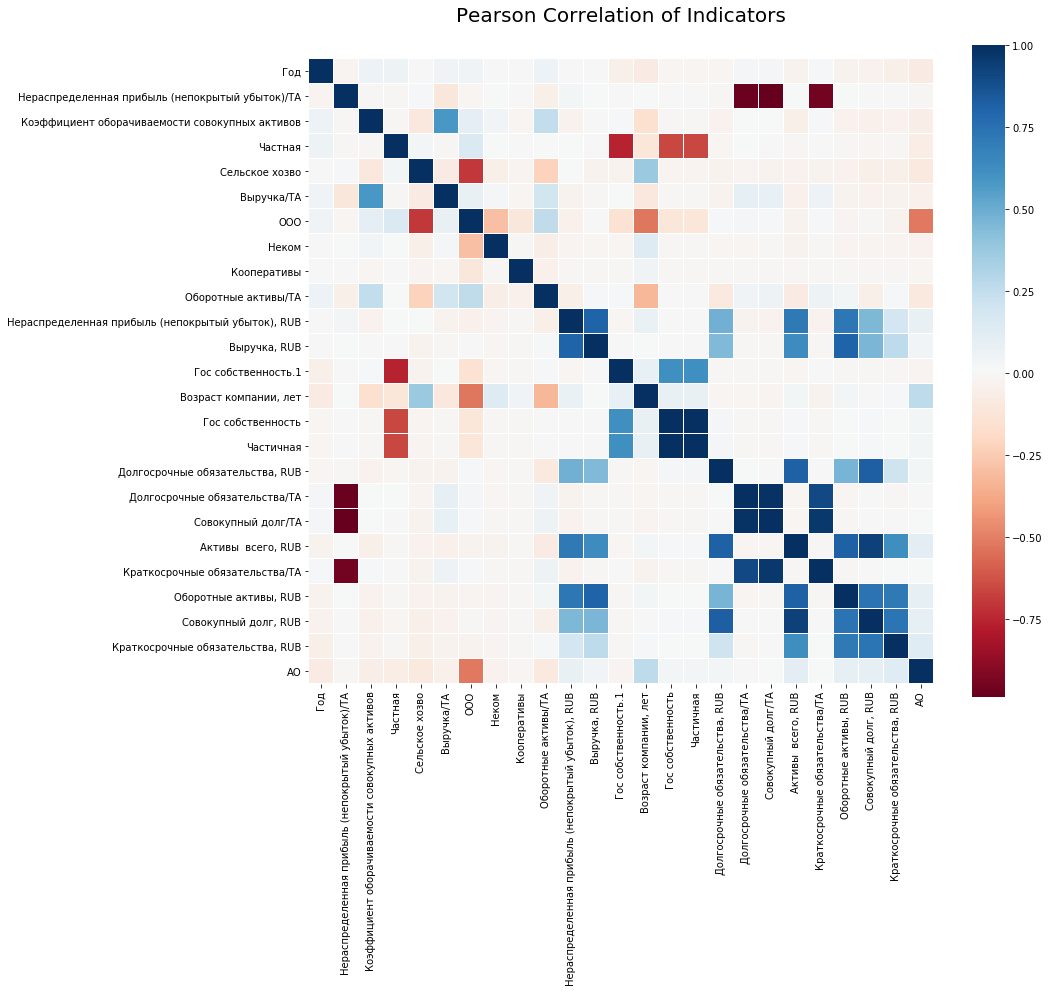

In [40]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=20)
sns.heatmap(data[cols].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

Теперь посмотрим на совместную корреляцию только тех коэффициентов, у которых модуль коэффициента корреляции с Y (статус) > 0.05

In [18]:
high_corr_cols = np.array(tabl.indicator[abs(tabl['value']) > 0.05])

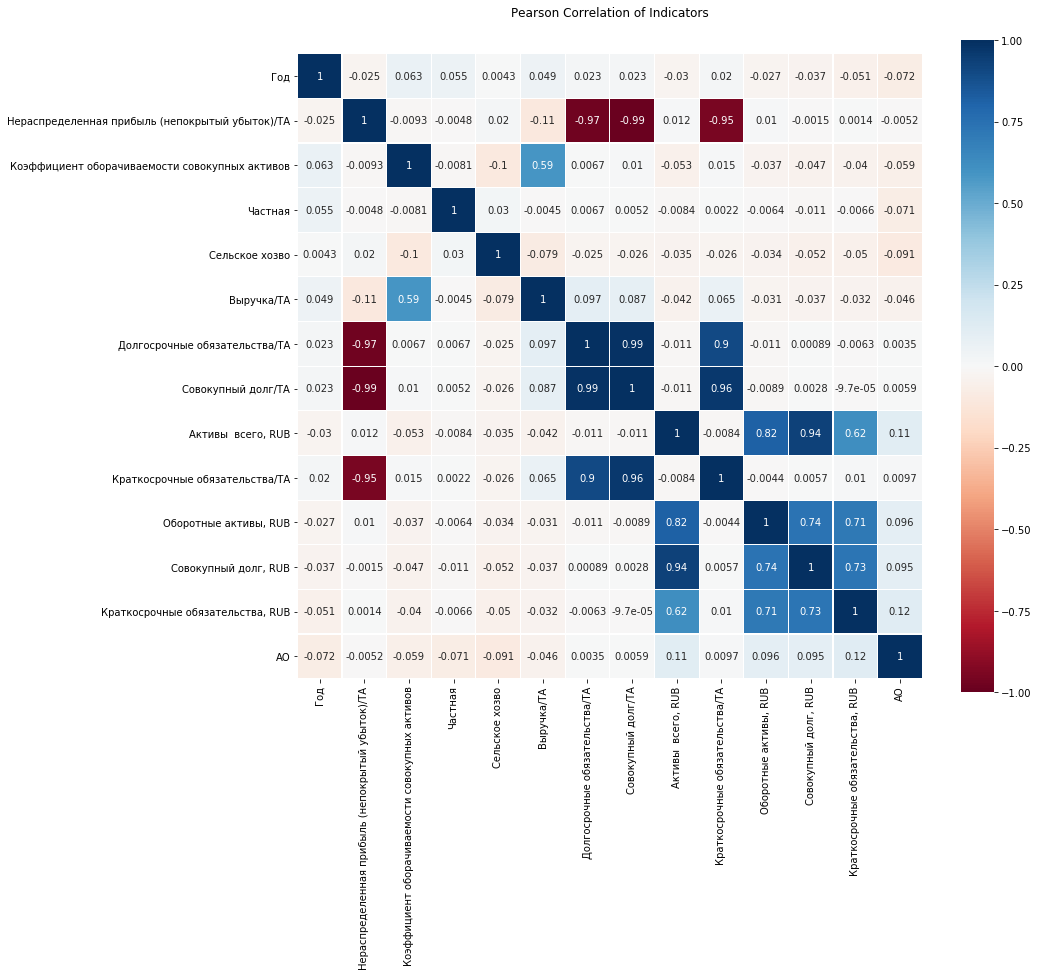

In [19]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Indicators', y=1.05, size=12)
sns.heatmap(data[high_corr_cols].corr(),
            linewidths=0.1, vmax=1.0, vmin=-1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Видим, что год очень сильно коррелирует с данными. посмотрим на статистики коэффициентов в зависимости от года

In [20]:
data_num.groupby('Год').mean()

,"Возраст компании, лет","Оборотные активы, RUB","Активы всего, RUB","Нераспределенная прибыль (непокрытый убыток), RUB","Долгосрочные обязательства, RUB","Краткосрочные обязательства, RUB","Совокупный долг, RUB","Выручка, RUB",Коэффициент оборачиваемости совокупных активов,Оборотные активы/ТА,Нераспределенная прибыль (непокрытый убыток)/ТА,Долгосрочные обязательства/ТА,Краткосрочные обязательства/ТА,Совокупный долг/ТА,Выручка/ТА,Гос собственность,Частичная,Частная,АО,Гос собственность.1,Сельское хозво,Неком,Кооперативы,ООО
Год,,,,,,,,,,,,,,,,,,,,,,,,
12.00,22.00,241837500.00,293735000.00,2026000.00,1340500.00,241385000.00,242725500.00,4774500.00,0.24,0.61,0.01,0.01,0.60,0.62,0.14,0.00,0.00,0.50,0.00,0.50,0.00,0.00,0.00,0.50
13.00,15.75,1051833500.00,1090570500.00,11685000.00,74601500.00,999153500.00,1073755000.00,1519876500.00,1.07,0.67,0.09,0.04,0.83,0.87,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
14.00,17.00,211504666.67,340370000.00,44512666.67,44841333.33,218373000.00,263214333.33,276868333.33,1.22,0.67,0.15,0.28,0.50,0.77,1.72,0.00,0.00,1.00,0.33,0.00,0.00,0.00,0.00,0.67
15.00,17.67,62939333.33,97961666.67,11039333.33,14184000.00,42691000.00,56875000.00,30057000.00,0.26,0.78,0.18,0.17,0.43,0.61,0.26,0.00,0.00,1.00,0.33,0.00,0.00,0.00,0.00,0.67
17.00,13.62,119537000.00,130337250.00,7439000.00,4480500.00,97294500.00,101775000.00,56708500.00,0.71,0.66,0.28,0.22,1.04,1.26,0.70,0.00,0.00,1.00,0.50,0.00,0.00,0.00,0.00,0.50
19.00,14.91,135797744.61,251617803.53,58835260.44,73237399.48,92612280.68,165849680.16,159927183.78,1.81,0.65,-0.09,0.53,0.41,0.94,1.79,0.00,0.01,0.99,0.08,0.01,0.12,0.02,0.00,0.78
20.00,13.46,109580280.28,188627375.66,53532661.21,54863797.54,60231778.23,115095575.78,178398126.97,2.47,0.69,-0.91,1.00,0.69,1.69,2.53,0.00,0.00,0.99,0.05,0.01,0.11,0.02,0.00,0.81


Посмотрим соотношение банкротств/небанкротств в зависимости от года. Для наглядности сравним только 20 и 19 годы, по ним больше всего данных.

In [21]:
data_2019_2020 = df.copy()
data_2019_2020 = data_2019_2020.drop(data_2019_2020[data_2019_2020['Год'] == 12.0].index)
data_2019_2020 = data_2019_2020.drop(data_2019_2020[data_2019_2020['Год'] == 13.0].index)
data_2019_2020 = data_2019_2020.drop(data_2019_2020[data_2019_2020['Год'] == 14.0].index)
data_2019_2020 = data_2019_2020.drop(data_2019_2020[data_2019_2020['Год'] == 15.0].index)
data_2019_2020 = data_2019_2020.drop(data_2019_2020[data_2019_2020['Год'] == 17.0].index)

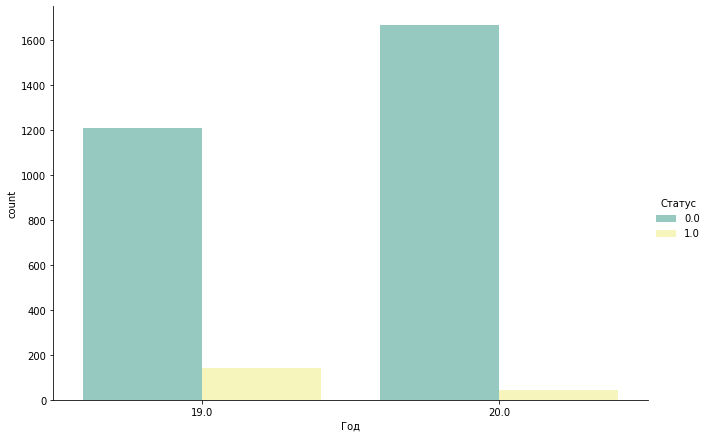

In [34]:
sns.catplot(x = 'Год', hue ="Статус", data=data_2019_2020, kind="count", height = 6, aspect = 1.5, palette = 'Set3', )
plt.show()

Доля банкротств в 19 и 20 годы по отдельности:

In [38]:
data_2019_2020.groupby(by=['Год'])['Статус'].mean()

Год
19.00   0.11
20.00   0.02
Name: Статус, dtype: float64

Интересно также посмотреть, как меняется в 2020 году, по сравнению с 2019 годом коэффициент оборачиваемости совокупных активов. Построим 2 графика в зависимости от статуса.

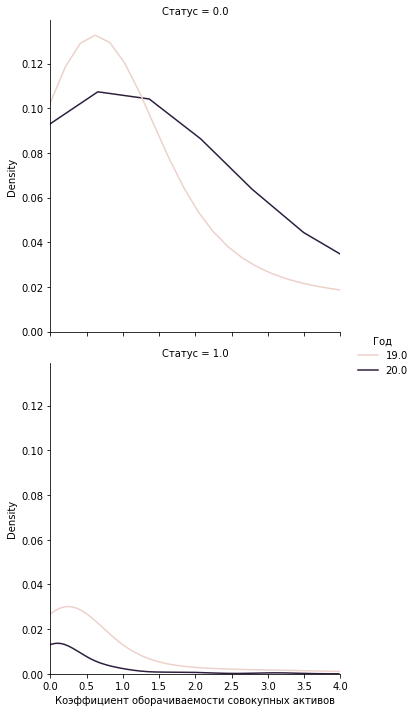

In [41]:
sns.displot(data=data_2019_2020, x="Коэффициент оборачиваемости совокупных активов",  hue="Год", row ='Статус', kind="kde")
plt.xlim(0, 4)
plt.show()